In [2]:
import numpy as np
import pandas as pd

import bebi103

import altair as alt

import bokeh.plotting
import bokeh.io

bokeh.io.output_notebook()

alt.data_transformers.enable('json')

/anaconda3/lib/python3.6/site-packages/bebi103/viz.py:38: UserWarning: Could not import `stan` submodule. Perhaps pystan is not properly installed.
  warnings.warn('Could not import `stan` submodule. Perhaps pystan is not properly installed.')
/anaconda3/lib/python3.6/site-packages/bebi103/__init__.py:19: UserWarning: Could not import `stan` submodule. Perhaps pystan is not properly installed.
  warnings.warn('Could not import `stan` submodule. Perhaps pystan is not properly installed.')


Loading BokehJS ...

DataTransformerRegistry.enable('json')

In [3]:
df = pd.read_csv('ant_joint_locations.csv', comment = '#')
df['x(mm)'] = df['x_coord'] * 0.08
df['y(mm)'] = df['y_coord'] * 0.08
df.head()

,frame,beetle_treatment,ID,bodypart,x_coord,y_coord,likelihood,x(mm),y(mm)
0,0,dalotia,0,head,73.086,193.835,1.0,5.84688,15.50680
1,1,dalotia,0,head,73.730,194.385,1.0,5.89840,15.55080
2,2,dalotia,0,head,75.673,195.182,1.0,6.05384,15.61456
3,3,dalotia,0,head,77.319,196.582,1.0,6.18552,15.72656
4,4,dalotia,0,head,78.128,197.891,1.0,6.25024,15.83128


In [4]:
inds = df['bodypart'] == 'thorax'
df_thorax = df.loc[inds,:]
df_thorax.head()

,frame,beetle_treatment,ID,bodypart,x_coord,y_coord,likelihood,x(mm),y(mm)
9999,0,dalotia,0,thorax,74.375,175.692,1.0,5.95000,14.05536
10000,1,dalotia,0,thorax,74.535,176.375,1.0,5.96280,14.11000
10001,2,dalotia,0,thorax,74.460,176.528,1.0,5.95680,14.12224
10002,3,dalotia,0,thorax,75.074,177.179,1.0,6.00592,14.17432
10003,4,dalotia,0,thorax,75.479,178.121,1.0,6.03832,14.24968


In [5]:
Inds1 = df_thorax['ID'] <= 5

Ant_Sceptobius = alt.Chart(df_thorax.loc[Inds1, :], height = 400, width =400
     ).mark_line(
     ).encode(
        x=alt.X('x(mm):Q'),
        y=alt.Y('y(mm):Q'),
        order='frame:Q',
        color='ID:Q'
     )


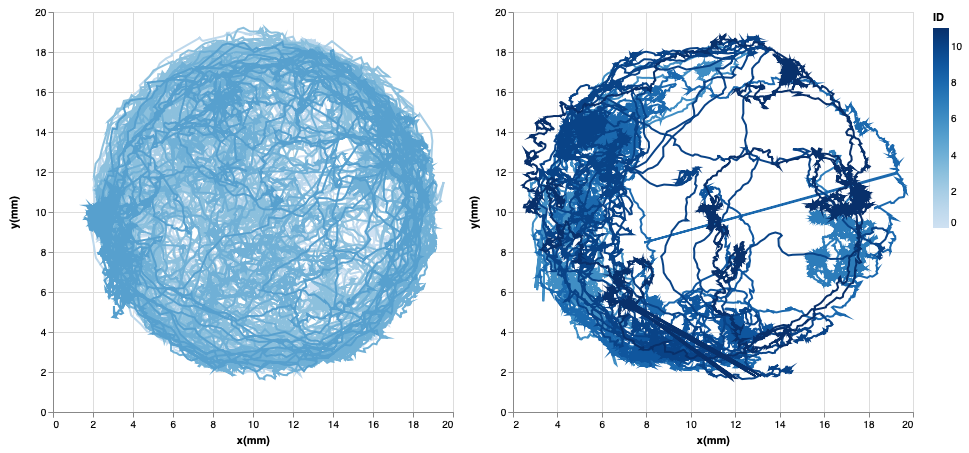

In [6]:
Inds2 = df_thorax['ID'] > 5

Ant_Dalotia = alt.Chart(df_thorax.loc[Inds2, :], height = 400, width =400
     ).mark_line(
     ).encode(
        x=alt.X('x(mm):Q'),
        y=alt.Y('y(mm):Q'),
        order='frame:Q',
        color='ID:Q'
     )

Ant_Sceptobius | Ant_Dalotia


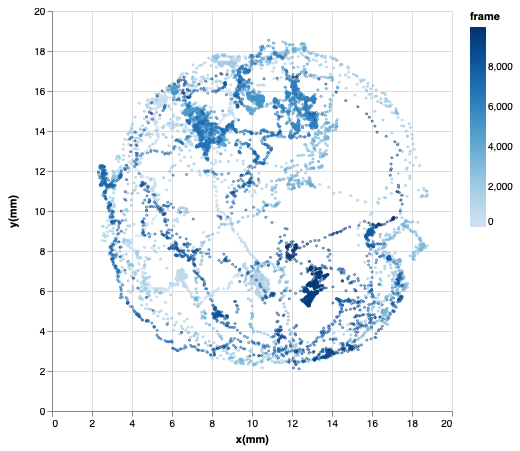

In [17]:


Inds3 = df_thorax['ID'] == 0

Ant_Sceptobius_0 = alt.Chart(df_thorax.loc[Inds3, :], height = 400, width =400
     ).mark_point(size =1
     ).encode(
        x=alt.X('x(mm):Q'),
        y=alt.Y('y(mm):Q'),
        order='frame:Q',
        color='frame:Q',
     )

Ant_Sceptobius_0